In [1]:
!pip install opencv-python-headless

In [2]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()   # choose your image file
image_path = list(uploaded.keys())[0]

Saving 1000052368 (1).jpg to 1000052368 (1).jpg


(np.float64(-0.5), np.float64(943.5), np.float64(1279.5), np.float64(-0.5))

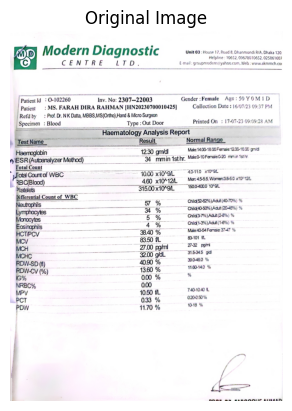

In [12]:
image = cv2.imread(image_path)

# Convert BGR → RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

In [13]:
# 1️⃣ Resize (improves OCR detection)
height, width = image.shape[:2]
image = cv2.resize(
    image,
    (width * 2, height * 2),
    interpolation=cv2.INTER_CUBIC
)

# 2️⃣ Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3️⃣ Increase Contrast using CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
contrast = clahe.apply(gray)

# 4️⃣ Denoising
# denoised = cv2.fastNlMeansDenoising(contrast, h=30)

blur = cv2.GaussianBlur(contrast, (3, 3), 0)

denoised = cv2.fastNlMeansDenoising(
    blur,
    None,
    h=45,
    templateWindowSize=7,
    searchWindowSize=21
)

# 5️⃣ Adaptive Thresholding
processed = cv2.adaptiveThreshold(
    denoised,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)

In [20]:
processed = cv2.adaptiveThreshold(
    denoised,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    1
)

In [21]:
cv2.imwrite("processed2.png", processed)
files.download("processed2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

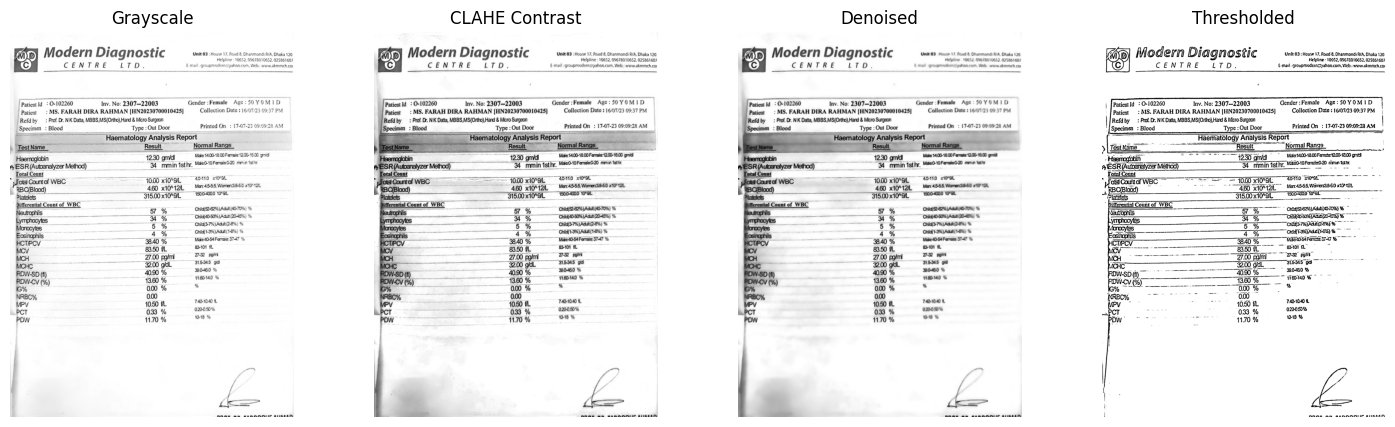

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

axes[0].imshow(gray, cmap="gray")
axes[0].set_title("Grayscale")

axes[1].imshow(contrast, cmap="gray")
axes[1].set_title("CLAHE Contrast")

axes[2].imshow(denoised, cmap="gray")
axes[2].set_title("Denoised")

axes[3].imshow(processed, cmap="gray")
axes[3].set_title("Thresholded")

for ax in axes:
    ax.axis("off")

plt.show()